## UCI SECOM(Linear Regression)-1
#### Data preprocessing
- 결측값 900개 넘는 열 삭제하고 남은 결측값은 0으로 대체한다.

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv('uci-secom.csv')

In [3]:
# Data shape 및 상위 5개 열 보기
print(data.shape)
data.head()

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
# include='all'하면 입력의 모든 열이 데이터 출력으로 포함, 기본값인 'None'은 수치데이터가 있는 열만 결과에 포함
data.describe(include='all')

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
unique,1534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-10-15 01:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,NaN,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,NaN,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,NaN,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,NaN,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,NaN,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000


## 1. Data Preprocessing

In [5]:
# Check data's Null values
data.isnull().any().any()

True

위의 결과를 통해 데이터에 결측값이 있다는 것을 확인했고, Null값이 900개가 넘는 Column은 삭제하고 나머지 Column의 Null값은 0으로 대체하는 전처리 방법을 택한다.

In [6]:
# 각 Column별로 결측값의 수 확인
d=data.isnull().sum()
d

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [7]:
# NaN값이 900개가 넘는 경우 j배열에 저장
j = []

for i in d.keys():
    if(d[i]>900):
        print(i,d[i])
        j.append(i)

85 1341
109 1018
110 1018
111 1018
157 1429
158 1429
220 1341
244 1018
245 1018
246 1018
292 1429
293 1429
358 1341
382 1018
383 1018
384 1018
492 1341
516 1018
517 1018
518 1018
578 949
579 949
580 949
581 949


In [8]:
# Get rid of 'Time' column because it's meaningless
data=data.drop(['Time'],axis=1)

# Data에서 결측값 900개 넘는 j Column 삭제
data.drop(j, axis=1, inplace=True)
print(data.shape)
data

(1567, 567)


,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [9]:
# 남은 NaN값은 0으로 대체
data.replace(np.nan, 0 , inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,0.0000,...,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [10]:
# Check data's Null values
data.isnull().any().any()

False

### Data Scaling
- 1. StandardScaler 
- 2. PCA 차원축소

In [11]:
# Train/Test Dataset split을 위해 Dataset을 Data/Target값으로 분리
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [12]:
from imblearn.over_sampling import SMOTE
X_resample, y_resample  = SMOTE(random_state=1).fit_sample(X, y.values.ravel())

(1) StandardScaler: 각 feature의 평균을 0, 분산을 1로 변경, 모든 feature들이 같은 Scale을 갖게된다.

In [13]:
# 먼저 데이터를 학습용과 테스트용으로 분할
# test_test_split의 random_state를 제외한 다른 하이퍼파라미터는 default로 두기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, random_state=50)

#### ※ Scaler를 사용하기 전에 주의할 점
scaler는 fit과 transform 매서드를 지니고 있다. fit 매서드로 데이터 변환을 학습하고, transform 매서드로 실제 데이터의 스케일을 조정한다.
이때! fit 매서드는 학습용 데이터에만 적용해야한다. 그 후 transform 매서드를 학습용 데이터와 테스트 데이터에 적용한다.

In [14]:
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
X_sc = sc.fit_transform(X)
X_train_sc = sc.fit_transform(X_train)
print('Features Min value before Scale : \n {}'. format(X_train.min(axis=0)))
print('Features Max value before Scale : \n {}'. format(X_train.max(axis=0)))
print('Features Min value after Scale : \n {}'. format(X_train_sc.min(axis=0)))
print('Features Max value after Scale : \n {}'. format(X_train_sc.max(axis=0)))
X_test_sc = sc.transform(X_test)

Features Min value before Scale : 
 1      0.0000
2      0.0000
3      0.0000
4      0.0000
5      0.0000
        ...  
585    1.2845
586   -0.0060
587    0.0000
588    0.0000
589    0.0000
Length: 565, dtype: float64
Features Max value before Scale : 
 1      2846.4400
2      2315.2667
3      3715.0417
4      1112.4728
5       100.0000
         ...    
585      99.3032
586       0.1028
587       0.0799
588       0.0286
589     737.3048
Length: 565, dtype: float64
Features Min value after Scale : 
 [-1.41494730e+01 -1.38811324e+01 -3.52634756e+00 -6.95298303e-02
 -1.40873896e+01 -1.12293367e+01 -1.32362671e+01 -2.09555940e+01
 -3.89871899e+00 -4.05955816e+00 -4.12047389e+01 -3.89066009e+01
  0.00000000e+00 -3.33816532e+00 -2.82368556e+01 -4.84116167e+00
 -4.18021700e+01 -4.00204583e+01 -1.04263097e+01 -1.51678392e+01
 -2.00555655e+00 -6.86610697e+00 -4.55368102e+00 -5.62605148e+00
 -5.42954254e+00 -6.78755856e+00 -4.51224547e+00 -1.44351308e+01
 -6.09718324e+00 -5.92387905e+00 -6.98569

(2) PCA차원축소

- 많은 feature로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
-  일반적으로 차원이 증가할수록, 즉 feature가 많아질수록 예측 신뢰도가 떨어지고, 과적합(overfitting)이 발생하고, 개별 feature간의 상관관계가 높을 가능성이 있음

In [15]:
from sklearn.decomposition import PCA
# Initializing PCA and fitting
# Choose minimum number of PCA features that 85% variance is retained to avoid overfitting
pca = PCA(0.85)
X_sc_pca = pca.fit_transform(X_sc) # StandardScaler에서 학습용 데이터에 적용한 것처럼 fit과 transform 둘 다를 적용해줘야 하네~~??
X_sc_pca_pd = pd.DataFrame(data = X_sc_pca)

In [16]:
# Transform train and test datasets
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

print('PCA차원 축소 이전 X_train:', X_train_sc.shape)
print('PCA차원 축소 이전 X_test:', X_test_sc.shape)
print('PCA차원 축소 이후 X_train:', X_train_pca.shape)
print('PCA차원 축소 이후 X_test:', X_test_pca.shape)

PCA차원 축소 이전 X_train: (2194, 565)
PCA차원 축소 이전 X_test: (732, 565)
PCA차원 축소 이후 X_train: (2194, 99)
PCA차원 축소 이후 X_test: (732, 99)


PCA차원 축소로 Feature가 565개에서 99개로 줄어 차원이 감소 됐음을 확인 할 수 있다.

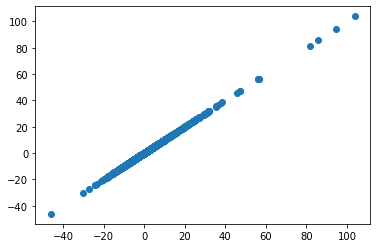

In [17]:
plt.scatter(X_sc_pca[:,1:-1], X_sc_pca[:,1:-1]) #해석 필요

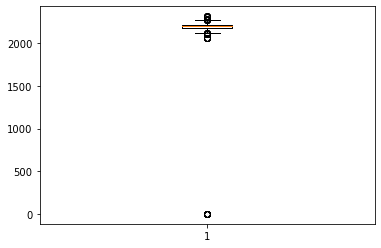

In [18]:
plt.boxplot(data['2'])

plt.show()

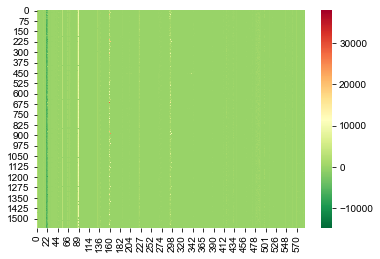

In [19]:
sns.heatmap(data, cmap='RdYlGn_r')
sns.set(rc = {'figure.figsize':(15,8)})

plt.show()

## 2. Data Modeling

### ✔ 교차검증
- 보통은 train set 으로 모델을 훈련, test set으로 모델을 검증한다.고정된 test set을 통해 모델의 성능을 검증하고 수정하는 과정을 반복하면, 결국 내가 만든 모델은 test set 에만 잘 동작하는 모델이 된다.즉, test set에 과적합(overfitting)하게 되므로, 다른 실제 데이터를 가져와 예측을 수행하면 엉망인 결과가 나와버리게 된다.
- 교차 검증은 train set을 train set + validation set으로 분리한 뒤, validation set을 사용해 검증하는 방식이다.

### ✔ L1규제, L2규제
- L1 규제 : W의 절댓값에 대해 패널티를 부여 / L1 규제를 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환 ➜ 라쏘 회귀
- L2 규제 : W의 제곱에 대한 패널티를 부여하는 방식 ➜ 릿지 회귀

### ✔ 릿지 회귀
- 주요 생성 파라미터 : alpha(릿지 회귀의 alpha L2 규제 계수)
- alpha 값이 커질수록 회귀 계수 값은 작아짐 **BUT** 회귀 계수를 0으로 만들지는 않는다

### ✔ 라쏘 회귀
- 회귀 계수의 크기를 감소시키는 L2 규제와는 달리, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거함
- 주요 생성 파라키터 : alpha(alpha L1 규제 계수)
- alpha의 크기가 증가함에 따라 회귀 계수가 0이 되기도 함

### ✔ 엘라스틱넷 회귀
- L2와 L1 규제를 결합한 회귀
- 최소화하는 W를 찾는것이 목표
- 휘귀 계수를 0으로 만드는 성향이 강한 라쏘 회귀에 이를 완화하기 위해 L2 규제 추가
- 단점 : 시간이 오래 걸림

📍 **회귀의 경우 MSE 값이 낮을수록 좋은 회귀 모델이다.** 📍

### 2.1 라쏘 회귀

In [20]:
#inport libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings(action='ignore')

In [21]:
lasso = Lasso(alpha=0.1, random_state=50)
lasso.fit(X_train_pca,y_train)

# 회귀 계수 출력
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00490138  0.04190624  0.         -0.00184257 -0.00820449 -0.
  0.          0.03253729 -0.01433528  0.04187635  0.03464052 -0.00746035
 -0.          0.00410291 -0.00343546 -0.00326007 -0.00360495  0.
  0.01215799  0.02631872 -0.00090049  0.01298936  0.         -0.
  0.         -0.02396909 -0.         -0.         -0.00646279  0.05066663
  0.          0.00447473  0.          0.         -0.01698289 -0.
  0.          0.         -0.         -0.         -0.         -0.02558013
  0.          0.          0.         -0.0155246   0.         -0.03531651
 -0.          0.         -0.         -0.00322156 -0.         -0.
  0.         -0.         -0.         -0.         -0.         -0.
  0.         -0.03174285  0.         -0.02015186 -0.          0.
  0.         -0.04409405  0.          0.         -0.05822066 -0.
  0.          0.         -0.         -0.03089941  0.         -0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.         -0.         -0.     

In [22]:
# 회귀 계수 큰 값 순으로 정렬
coef = pd.Series(data=np.round(lasso.coef_,1), index=X_sc_pca_pd.columns)
coef.sort_values(ascending=False)

29    0.1
89    0.1
98    0.0
36    0.0
26   -0.0
     ... 
67   -0.0
68    0.0
69    0.0
0     0.0
70   -0.1
Length: 99, dtype: float64

✅ **회귀 계수**
- 독립변수의 변화가 종속변수를 얼마나 변화시키는가?
- y=wx+b 식에서 w에 해당하는 값
- 회귀 계수가 클수록 종속변수에 미치는 영향, 관계의 정도가 커짐

In [23]:
y_pred = lasso.predict(X_test_pca)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

In [24]:
print("Accuracy : ", lasso.score(X_test_pca,y_test)*100)

Accuracy :  23.740451880075508


In [25]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print("RMSE : ", rmse)

RMSE :  1.0454167469786335


In [26]:
neg_mse_scores = cross_val_score(lasso, X_test_pca, y_test, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [27]:
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-0.75 -0.78 -0.83 -0.77 -0.73]
5 folds의 개별 RMSE scores :  [0.86 0.89 0.91 0.88 0.86]
5 folds의 평균 RMSE : 0.879


### 2.2 릿지 회귀

In [28]:
ridge = Ridge(alpha=0.1, random_state=50)
ridge.fit(X_train_pca,y_train)

# 회귀 계수 출력
print ("Lasso model:", (ridge.coef_))

Lasso model: [ 0.00827587  0.04786036 -0.00233067 -0.00710312 -0.02165282 -0.00808651
  0.00792746  0.03583776 -0.02519122  0.04378683  0.04771142 -0.01866393
 -0.00783337  0.02203337 -0.0206878  -0.02022118 -0.0184922   0.0116722
  0.02962243  0.0385202  -0.02568937  0.02670529  0.01359007  0.00362982
  0.00852302 -0.03730445  0.00759314 -0.00457554 -0.02213067  0.07353555
  0.00866486  0.02172046 -0.0026271   0.00605948 -0.05226278 -0.0117891
  0.02188273  0.00431224 -0.01685657 -0.00131528 -0.02004181 -0.05319966
 -0.00212283  0.03340426  0.02900276 -0.0391077   0.01675973 -0.0589956
 -0.00320943  0.02515335 -0.01551783 -0.04621227 -0.00926913 -0.01286181
  0.01494924  0.00422276 -0.01201637 -0.01621689 -0.01972136 -0.03384894
  0.03019843 -0.06824307  0.00931248 -0.05544795 -0.00991215  0.00625204
  0.01639198 -0.08237397  0.02534548  0.04243417 -0.09287145  0.00382749
  0.01402796  0.03330014  0.00658645 -0.07801425  0.01155844 -0.0146927
  0.05726467 -0.01344562  0.03035656 -0.06

In [29]:
# 회귀 계수 큰 값 순으로 정렬
coef = pd.Series(data=np.round(ridge.coef_,1), index=X_sc_pca_pd.columns)
coef.sort_values(ascending=False)

78    0.1
29    0.1
89    0.1
98   -0.0
33    0.0
     ... 
81   -0.1
63   -0.1
75   -0.1
67   -0.1
97   -0.1
Length: 99, dtype: float64

In [30]:
y_pred = ridge.predict(X_test_pca)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

In [31]:
print("Accuracy : ", ridge.score(X_test_pca,y_test)*100)

Accuracy :  26.12037099911214


In [32]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print("RMSE : ", rmse)

RMSE :  0.9552844110582612


In [33]:
neg_mse_scores = cross_val_score(ridge, X_test_pca, y_test, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [34]:
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-0.89 -1.08 -0.83 -0.69 -0.7 ]
5 folds의 개별 RMSE scores :  [0.94 1.04 0.91 0.83 0.84]
5 folds의 평균 RMSE : 0.912


### 2.3 엘라스틱넷 회귀

In [35]:
elasticnet = ElasticNet(alpha=0.1, random_state=50)
elasticnet.fit(X_train_pca,y_train)

ElasticNet(alpha=0.1, random_state=50)

In [36]:
y_pred = elasticnet.predict(X_test_pca)

#Convert the sign of the predicted values as the classifier
y_pred2 = np.sign(y_pred)

In [37]:
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

print("RMSE : ", rmse)

RMSE :  0.9524199835873941


In [38]:
neg_mse_scores = cross_val_score(elasticnet, X_test_pca, y_test, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [39]:
print('5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores : ', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores :  [-0.72 -0.74 -0.79 -0.69 -0.68]
5 folds의 개별 RMSE scores :  [0.85 0.86 0.89 0.83 0.82]
5 folds의 평균 RMSE : 0.850


📍 **엘라스틱넷 회귀 모델의 RMSE 값이 가장 낮음 ➜ 3개의 회귀 모델 중 가장 좋은 모델** 📍